 The “players.csv” data set contains a list of unqiue players and their demographic, behaivour and subscription status through 196 player observations of 7 different variables. This data was likely collected from records of gaming profiles (age, hashedemail, name, gender, experience) and activity logs (hours played, subscription).  

Quantitative/Numerical Variables:  

Age (Age, int): Age of the player in years (. The lowest is 8 years old and highest 99 years old. Data possibly derived from their registration profile. 

An issue within this variable is the significant outlier values. The mean is 21.14 years; the outliers remain in the older ages from 40-99years of age (90s are extreme outliers). Along with this, there are missing age values inputted as NA. 

played_hours num or dbl): The hours the player has spent on the platform in their total gameplay (range from 0-223.1 hours). Determines how engaged and commited the player is to the game.  

The issues within this variable are significant outlier values. The mean is 5.85 hours; the outliers are 30-223.1 hours. Additionally, there are many inactive users with 0hr game time, indicating that they have never played the game.  

The outliers of age and hours and inactive users can be filtered out to better examine the relationships between chosen variables (age, hours, subscription) without these distorting influences. 

NOTE: Although you can examine these outliers by mathematically comparing values to the mean and medium (for both age and hours played), you can also clearly note the outliers in the visualizations (ref. sub_scatter).  

	Summary Statistics: 

		Mean age: 21.14 

		Mean player_hours: 5.85 

Categorical Variables: 

experiance (chr): Skill level of the player (Beginner, Amateur, Regular, Veteran, Pro) either self-reported or assigned. “Beginner” being least skillful, “Pro” very skillful.  

subscription (lgl): Indicates whether the player is subscribed (TRUE) or not subscribed (FALSE) to the mailing list. 

hashedEmail (chr): hash of player’s email address. Included in the database to send emails if subscribed or other communication if necessary to the player. 

name (chr): Name of the player, self-reported or self-chosen. A username or real legal name. 

gender (chr): Gender of the player, either “male”, “female”, “agender”, “two-spirited”, “prefer not to say”, “non-binary”, “other”. Self-reported data in their profiles. 

TO NOTE: Additionally, in this data, there is a clear sample bias. Majority of players are male and are 17 years of age. This is not representative of the general population (other genders, ages, etc.). This can mean that the clustering at these age and gender groups can only account for findings regarding these biases. 

Other potential issues can reside in the methods of how each variable in the data was collected. We can assume that name, gender, email etc. were self-reported, however the process of this report remains ambigious. For example, in the experiance variable, how would a player be distinguished between an amateur and a regular. 

The broad question referred to in formulating this predictive analysis project is “What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?” This inquiry is further narrowed down to “Can a player's hours played, and age predict if the player is subscribed to the newsletter in the data set, players.csv".  

In the context of this topic, the variables needed are Age, player_hours and subscription. Therefore, these will be selected–using select()–and derived from players.csv. From there, any NA values will be filtered out, specifically for Age. Then, critical outliers will be filtered out for both quantitative variables. Age will filter out any ages 40+ years old and played_time will filter out any inactivity (0 hours) along with outliers, to exclude 30+hours. Once these wrangles have been completed, the data can be better displayed to explore the relationship between age, hours played, and subscription status to answer the predictive question. 

In answering this predictive analysis question, K Nearest Neighbours Classification will be the method used. There are two numerical predictor variables (binary) to predict a qualitative variable which is an optimal fomat that KNN classification deals with. Similair demographics (age and playtime) to act as neighbours in predicting subscription habits will be analyzed. An assumption that points closer to eachother in the predictor space will result in more similair response values will be placed to do this. The potential weakness of this method is the sensitivity to the outlier variables that can influence the outcome of neighbour points chosen which will then impact the predictions made. The outliers can “stretch” the values. However, filtering out the outliers and correct standardization can resolve this issue. Along with this, caution must be taken in choosing a K value to avoid under and over fitting. 

The data will be shuffled, stratiefied and then split into training (70%) and test (30%) sets at the beginning of the process, using initial_split(). In building and training the classifier, standardization of age and player hours will take place.  Then a confusion matrix along with accuracy, precision and recall will be utilized in the selection of a model. The “positve” class is those who are subscribed (subscribe = TRUE) and “negative” (subscribe = FALSE). High accuracy is importnant to prevent general instances of mistakes, however, due to many of users being subscribed, this can be misleading as the classifier may just predict “TRUE” everytime, leading to a high accuracy. High precision, to quanitfy how many positive values were classified correctly and recall, to know how many positives were able to be identified. These additional are pertinent and more important than accuracy to build reliability in this classifier. Additionally, a majority classifier will be compared to ensure the classifier has a higher accuracy than the accuracy of a classifier that always predicts the most frequent (subscribe = TRUE) cases.  

The training set will further be split into 5 chunks for cross validation, with 1 validation set and 4 training subsets in each fold, use vfold_cv(). From there, tune_grid() will be used to fit the model for each value in a range of parameter values (1-100, by = 5 intervals). The accuracies of K values will be analyzed both computationally and visaully (plot) and the highest accuracy (peak) will be selected as the K value used in this model. 

In [24]:
library(repr)
library(tidyverse)
library(tidymodels)
options(repr.matrix.max.rows = 10)
source("cleanup.R")

Warning message in file(filename, "r", encoding = encoding):
“cannot open file 'cleanup.R': No such file or directory”


ERROR: Error in file(filename, "r", encoding = encoding): cannot open the connection


Demonstrate that the dataset can be loaded into R.

In [25]:
players <- read_csv("data/players.csv")
players

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,TRUE,b6e9e593b9ec51c5e335457341c324c34a2239531e1890b93ca52ac1dc76b08f,0.0,Bailey,Female,17
Veteran,FALSE,71453e425f07d10da4fa2b349c83e73ccdf0fb3312f778b35c5802c3292c87bd,0.3,Pascal,Male,22
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,57


Do the minimum necessary wrangling to turn your data into a tidy format. Do not do any additional wrangling here; that will happen later during the group project phase.

The dataset is already in tidy format, each variable is a column, each observation a row, and each value is a single cell. Therefore, no additional wrangling is required before analysis. 

Compute the mean value for each quantitative variable in the players.csv data set. Report the mean values in a table format.

In [26]:
mean_table <- players |>
    summarize(mean_played_hours = mean(played_hours, na.rm = TRUE),
    mean_age = mean(Age, na.rm = TRUE))

mean_table

mean_played_hours,mean_age
<dbl>,<dbl>
5.845918,21.13918


Make a few exploratory visualizations of the data to help you understand it.
Use our visualization best practices to make high-quality plots (make sure to include labels, titles, units of measurement, etc)
Explain any insights you gain from these plots that are relevant to address your question

# Bar Plot analysis of Age vs. Game time and subscription Status

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


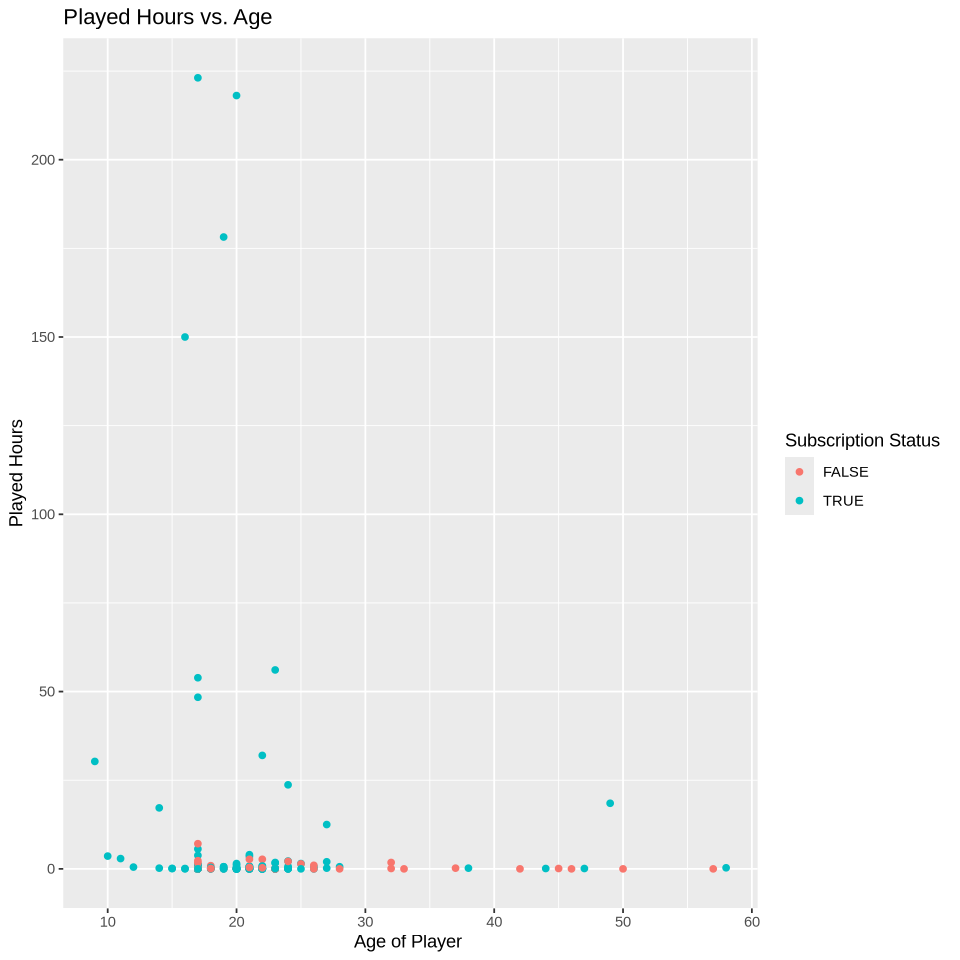

In [28]:
#to examine the relationship between played hours and age to the subscription status of the players, using scatter plot
options(repr.plot.width = 8, repr.plot.height = 8) 

sub_scatter <- players |>
    ggplot(aes(x = Age, y = played_hours, color = subscribe)) + 
        geom_point() + 
        labs(color = "Subscription Status") +
        xlab("Age of Player ") +
        ylab("Played Hours") +
        ggtitle("Played Hours vs. Age")

sub_scatter

#to examine the relationship between played hours and age to the subscription status of the players, using scatter plot


graph above includes outliers. we can filter values to a smaller region where played hours is < 4hrs and age is <=50 to "zoom" in and explore
the value further. note, this is not an accurate representation of the entire, data. just visual assistance to see the exploratory correlation between
qualitative variables

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Veteran,TRUE,7a4686586d290c67179275c7c3dfb4ea02f4d317d9ee0e2cee98baa27877a875,1.6,Lane,Female,23
Beginner,TRUE,4bed6f49b672974f706aa7f020b4f29020326bf594520593557cd381a51559b8,1.5,Sarah,Female,25
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Pro,FALSE,f7875ae87a61632030d5c4029ee8cf081be7047b2b4a9c04ab5a706f59786197,0.2,Liam,Male,17
Pro,FALSE,d46bd29a2ed08e3500bd8729085ef4b6f0ca65baf4c756f88b6bedf7a18e0352,1.7,Asher,Male,17
Regular,FALSE,8e98b6db2053af0bc0e62cd55bcea5a08f23986dec3d02ca520ea039517e6744,0.1,Sam,Male,18


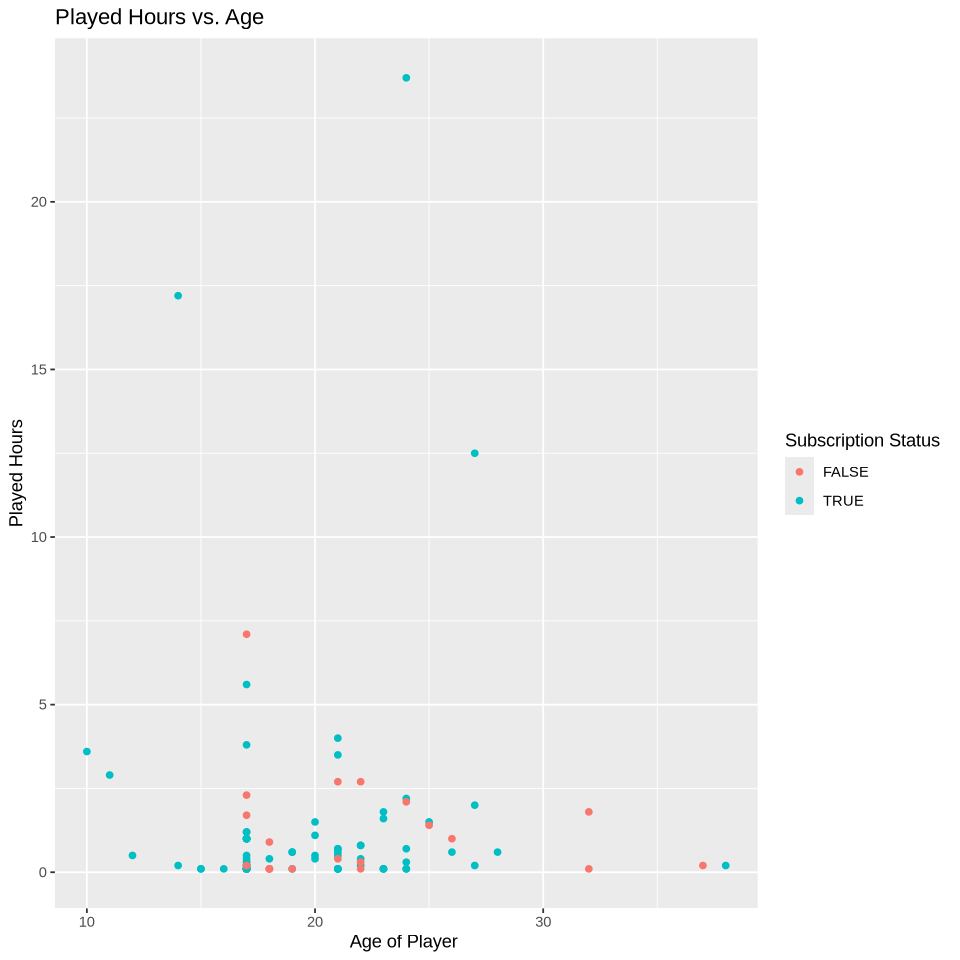

In [37]:
players_mod <- players |> #taking out outliers and inactive players in data to provide a more comphrehensible visualization
    filter(Age <= 40, played_hours <= 30, played_hours > 0)
players_mod 

#new scatter using the modified values
sub_scatter_mod <- players_mod|>
    ggplot(aes(x = Age, y = played_hours, color = subscribe)) + 
        geom_point() + 
        labs(color = "Subscription Status") +
        xlab("Age of Player ") +
        ylab("Played Hours") +
        ggtitle("Played Hours vs. Age")

sub_scatter_mod

 This scatter plot shows that most players are young (10–25yrs) and have low total playtime in hours with variety in subscribed and unsubscribed users spread, with a little more weight on subscribed. Often times, the players with moderate hours of play and younger (below 30 yrs) are subscribed. This suggests that the more engaged/commited and younger a player is the more likely they are to subscribe to the newsletter. 

# Bar Plot analysis of Age vs. Game time and subscription Status

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_bar()`).”


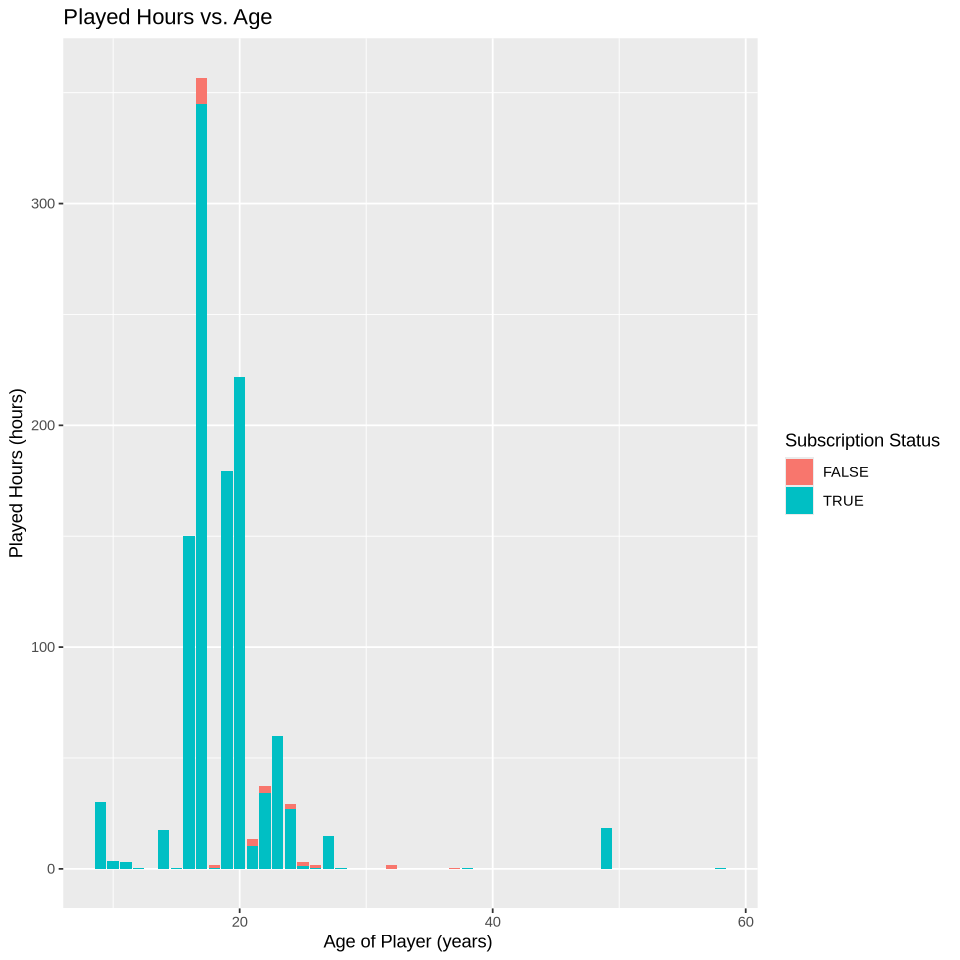

In [39]:
players_bar <- ggplot(players, aes(x = Age, y = played_hours, fill = subscribe)) +
    geom_bar(stat = "identity")+
    labs(fill = "Subscription Status") +
    xlab("Age of Player (years) ") +
    ylab("Played Hours (hours)") +
    ggtitle("Played Hours vs. Age") 

players_bar

This bar plot can show that the played hours increases for users around the 10-20s range of age (years). The lowest game play is around the higher ages (30+). Along with this, subscribtions status is fairly consistent within all age groups. This indicates that more engaged demographic of users are in the younger (10-20 yr olds) age range and the subscription patterns are consisten through all age ranges.